In [37]:
#imports libraries
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
#from google.colab import files
#uploaded = files.upload()

In [40]:
fashion_df = pd.read_excel(r"C:\Projects\Project Code\Data\Transactions_df.xlsx")

In [41]:
product_df = pd.read_excel(r"C:\Projects\Project Code\Data\Products_df.xlsx")

In [42]:
fashion_df.head()

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,returnCauseComment,IsManualDiscount,isManualPrice,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status,CustomerID
0,1011012090,101,2011-01-01,19:10:00,139.9,139.9,SM9406010XL,1,0.0,139.9,...,NaN,NaN,NaN,139.9,0.0,139.9,0.0,139.9,עודפים,10111090
1,1011012091,101,2011-01-01,19:12:00,139.9,0.0,SM9406010XL,-1,0.0,139.9,...,NaN,Y,NaN,139.9,0.0,139.9,0.0,139.9,עודפים,10111091
2,1011012091,101,2011-01-01,19:12:00,139.9,0.0,SM9406010L,1,0.0,139.9,...,NaN,NaN,NaN,139.9,0.0,139.9,0.0,139.9,עודפים,10111091
3,1011012092,101,2011-01-01,19:48:00,59.9,59.9,CU930942501,1,0.0,59.9,...,NaN,NaN,NaN,59.9,0.0,59.9,0.0,59.9,עודפים,10111092
4,1011012093,101,2011-01-01,20:34:00,399.9,399.9,EM865844930,1,0.0,399.9,...,NaN,NaN,NaN,399.9,0.0,399.9,0.0,399.9,עודפים,10111093


In [43]:
product_df.head()

,Unnamed: 0,makat,productDescription,size,color,brand,productFamily,familiydescription,calss1,class2,class3,paritMerakez,customerPrice,gender,seaseon,status
0,0,AM805021330,PIONEER PEAK P peatmoss 30,30,peatmoss,NaN,31,seasonal clothing,causal pants A,Sportswear,pants,AM8050,359.9,male,S13,outlet
1,1,AM805021332,PIONEER PEAK P peatmoss 32,32,peatmoss,NaN,31,seasonal clothing,causal pants A,Sportswear,pants,AM8050,359.9,male,S13,outlet
2,2,AM805021334,PIONEER PEAK P peatmoss 34,34,peatmoss,NaN,31,seasonal clothing,causal pants A,Sportswear,pants,AM8050,359.9,male,S13,outlet
3,3,AM805021336,PIONEER PEAK P peatmoss 36,36,peatmoss,NaN,31,seasonal clothing,causal pants A,Sportswear,pants,AM8050,359.9,male,S13,outlet
4,4,AM805021340,PIONEER PEAK P peatmoss 40,40,peatmoss,NaN,31,seasonal clothing,causal pants A,Sportswear,pants,AM8050,359.9,male,S13,outlet


**What was the best month for sales? How much was earned that month?**

In [44]:
fashion_df.dtypes

transactionNum                        int64
branchCode                            int64
transactionDate              datetime64[ns]
transactionTime                      object
pricePerUnit                        float64
totalForDeal                        float64
makat                                object
itemAmount                            int64
DiscountPrecent                     float64
NetPricePerUnit                     float64
total                               float64
saleCode                             object
saleDescription                      object
retuenCauseCode                     float64
returnCauseDescription               object
returnCauseComment                   object
IsManualDiscount                     object
isManualPrice                        object
priceAfterDiscount                  float64
effectiveDiscountPrecent            float64
ActualPrice                         float64
generalPrecentageDiscount           float64
ActualProcePerDeal              

In [45]:
fashion_df['transactionDate'] = pd.to_datetime(fashion_df['transactionDate'])


In [46]:
fashion_df['transactionDate'].dt.to_period('M')


0         2011-01
1         2011-01
2         2011-01
3         2011-01
4         2011-01
           ...   
189692    2014-03
189693    2014-03
189694    2014-03
189695    2014-03
189696    2014-03
Name: transactionDate, Length: 189697, dtype: period[M]

In [47]:
fashion_df['Year'] = pd.to_datetime(fashion_df['transactionDate']).dt.year
fashion_df['Month'] = pd.to_datetime(fashion_df['transactionDate']).dt.month
fashion_df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
189692    3
189693    3
189694    3
189695    3
189696    3
Name: Month, Length: 189697, dtype: int64

In [48]:
# fashion_df['Month'] = fashion_df['transactionDate'].dt.to_period('M')
# fashion_df['Month'] = fashion_df['Month'].astype('int32')
# fashion_df.tail()

In [49]:
fashion_df.tail ()

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,isManualPrice,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status,CustomerID,Year,Month
189692,1011036246,101,2014-03-23,15:29:00,999.9,1816.69,WM6711010XL,1,34.99,650.00,...,NaN,650.00,34.99,650.03,0.0,650.03,פעיל,1011324,2014,3
189693,1011036246,101,2014-03-23,15:29:00,399.9,1816.69,AM823002838,1,20.00,319.92,...,NaN,319.92,20.00,319.92,0.0,319.92,פעיל,1011324,2014,3
189694,1011036246,101,2014-03-23,15:29:00,589.9,1816.69,AM867901038,1,20.00,471.92,...,NaN,471.92,20.00,471.92,0.0,471.92,פעיל,1011324,2014,3
189695,1011036247,101,2014-03-23,16:24:00,100.0,79.90,9900100,-3,0.00,100.00,...,NaN,100.00,0.00,100.00,0.0,100.00,פעיל,1011324,2014,3
189696,1011036247,101,2014-03-23,16:24:00,499.9,79.90,BM258501142,1,24.00,379.90,...,NaN,379.90,24.00,379.92,0.0,379.92,פעיל,1011324,2014,3


In [50]:
fashion_df.Month

0         1
1         1
2         1
3         1
4         1
         ..
189692    3
189693    3
189694    3
189695    3
189696    3
Name: Month, Length: 189697, dtype: int64

In [51]:
non_df = fashion_df[fashion_df.isna().any(axis=1)]

non_df.head()

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,isManualPrice,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status,CustomerID,Year,Month
0,1011012090,101,2011-01-01,19:10:00,139.9,139.9,SM9406010XL,1,0.0,139.9,...,NaN,139.9,0.0,139.9,0.0,139.9,עודפים,10111090,2011,1
1,1011012091,101,2011-01-01,19:12:00,139.9,0.0,SM9406010XL,-1,0.0,139.9,...,NaN,139.9,0.0,139.9,0.0,139.9,עודפים,10111091,2011,1
2,1011012091,101,2011-01-01,19:12:00,139.9,0.0,SM9406010L,1,0.0,139.9,...,NaN,139.9,0.0,139.9,0.0,139.9,עודפים,10111091,2011,1
3,1011012092,101,2011-01-01,19:48:00,59.9,59.9,CU930942501,1,0.0,59.9,...,NaN,59.9,0.0,59.9,0.0,59.9,עודפים,10111092,2011,1
4,1011012093,101,2011-01-01,20:34:00,399.9,399.9,EM865844930,1,0.0,399.9,...,NaN,399.9,0.0,399.9,0.0,399.9,עודפים,10111093,2011,1


**Sales**

In [52]:
# Removing returns items
fashion_df = fashion_df.drop(fashion_df[fashion_df.itemAmount < 1].index) 

In [53]:
# fashion_df.head()
fashion_df.tail()

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,isManualPrice,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status,CustomerID,Year,Month
189691,1011036246,101,2014-03-23,15:29:00,249.9,1816.69,AM6215993XL,1,50.00,124.95,...,NaN,124.95,50.00,124.95,0.0,124.95,פעיל,1011324,2014,3
189692,1011036246,101,2014-03-23,15:29:00,999.9,1816.69,WM6711010XL,1,34.99,650.00,...,NaN,650.00,34.99,650.03,0.0,650.03,פעיל,1011324,2014,3
189693,1011036246,101,2014-03-23,15:29:00,399.9,1816.69,AM823002838,1,20.00,319.92,...,NaN,319.92,20.00,319.92,0.0,319.92,פעיל,1011324,2014,3
189694,1011036246,101,2014-03-23,15:29:00,589.9,1816.69,AM867901038,1,20.00,471.92,...,NaN,471.92,20.00,471.92,0.0,471.92,פעיל,1011324,2014,3
189696,1011036247,101,2014-03-23,16:24:00,499.9,79.90,BM258501142,1,24.00,379.90,...,NaN,379.90,24.00,379.92,0.0,379.92,פעיל,1011324,2014,3


In [54]:
fashion_df.itemAmount.unique()

array([ 1,  2,  3, 10,  4,  5, 30,  8, 20,  6,  7, 13, 45, 33, 40,  9, 14,
       11, 16, 12, 50, 18], dtype=int64)

In [55]:
#Convert 'itemAmount' and 'priceAfterDiscount' to numeric
fashion_df['priceAfterDiscount'] = pd.to_numeric(fashion_df['priceAfterDiscount'])
fashion_df['itemAmount'] = pd.to_numeric(fashion_df['itemAmount'])
fashion_df['itemAmount'].dtype

dtype('int64')

In [87]:
#Add Sales column also = 'total'
fashion_df['Sales'] = fashion_df['total']

In [88]:
fashion_df.tail()

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status,CustomerID,Year,Month,Sales
189691,1011036246,101,2014-03-23,15:29:00,249.9,1816.69,AM6215993XL,1,50.00,124.95,...,124.95,50.00,124.95,0.0,124.95,פעיל,1011324,2014,3,124.95
189692,1011036246,101,2014-03-23,15:29:00,999.9,1816.69,WM6711010XL,1,34.99,650.00,...,650.00,34.99,650.03,0.0,650.03,פעיל,1011324,2014,3,650.00
189693,1011036246,101,2014-03-23,15:29:00,399.9,1816.69,AM823002838,1,20.00,319.92,...,319.92,20.00,319.92,0.0,319.92,פעיל,1011324,2014,3,319.92
189694,1011036246,101,2014-03-23,15:29:00,589.9,1816.69,AM867901038,1,20.00,471.92,...,471.92,20.00,471.92,0.0,471.92,פעיל,1011324,2014,3,471.92
189696,1011036247,101,2014-03-23,16:24:00,499.9,79.90,BM258501142,1,24.00,379.90,...,379.90,24.00,379.92,0.0,379.92,פעיל,1011324,2014,3,379.90


In [89]:
fashion_df.dtypes

transactionNum                        int64
branchCode                            int64
transactionDate              datetime64[ns]
transactionTime                      object
pricePerUnit                        float64
totalForDeal                        float64
makat                                object
itemAmount                            int64
DiscountPrecent                     float64
NetPricePerUnit                     float64
total                               float64
saleCode                             object
saleDescription                      object
retuenCauseCode                     float64
returnCauseDescription               object
returnCauseComment                   object
IsManualDiscount                     object
isManualPrice                        object
priceAfterDiscount                  float64
effectiveDiscountPrecent            float64
ActualPrice                         float64
generalPrecentageDiscount           float64
ActualProcePerDeal              

In [90]:
# The best Month for sales
fashion_df.groupby('Month').sum()

,transactionNum,branchCode,pricePerUnit,totalForDeal,itemAmount,DiscountPrecent,NetPricePerUnit,total,retuenCauseCode,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,CustomerID,Year,Sales
Month,,,,,,,,,,,,,,,,,
1,24122074666804,2409915,8435503.11,17649936.23,23554,367297.84,7105765.67,7212598.04,34.0,7.043424e+06,366262.88,7105761.97,1.917479e+04,7.043419e+06,176439794034,45544711,7212598.04
2,20977630818614,2095764,7063683.29,13606774.35,20729,478374.99,5384714.89,5455306.20,3.0,5.351130e+06,477899.59,5384716.31,8.600200e+03,5.351131e+06,147083346568,39707410,5455306.20
3,14268557944053,1425492,4715599.93,9944973.51,14190,291911.04,3691957.17,3751213.81,17.0,3.648911e+06,291761.24,3691957.07,9.616860e+03,3.648910e+06,114779906420,27070683,3751213.81
4,7010321267266,700357,2110662.64,3754047.94,6816,91768.14,1806922.39,1824666.82,4.0,1.795700e+06,91768.14,1806922.10,3.884820e+03,1.795700e+06,59239776215,13411832,1824666.82
5,9541893904617,953272,2559175.23,4771340.49,9270,158234.64,2135927.31,2161385.38,8.0,2.128096e+06,158234.64,2135926.97,2.586690e+03,2.128096e+06,71567985402,18214476,2161385.38
6,11191530209988,1118083,2983153.40,6272691.88,10865,170379.05,2521871.97,2577727.50,16.0,2.502731e+06,170379.05,2521870.51,6.635030e+03,2.502730e+06,84038437414,21268945,2577727.50
7,11447402910500,1143638,2965884.54,5806814.80,11114,221503.75,2388960.98,2416596.58,16.0,2.374996e+06,221503.75,2388961.51,4.833220e+03,2.374997e+06,81479311784,21868070,2416596.58
8,14055966807395,1404256,3647211.96,6821025.43,13443,357476.84,2708965.92,2731801.06,3.0,2.696352e+06,357476.84,2708967.17,4.649790e+03,2.696353e+06,98373090448,26635847,2731801.06
9,12016695025718,1200525,3373394.52,5645456.09,11519,265129.14,2644130.15,2669011.00,3.0,2.610926e+06,265129.14,2644131.64,1.028974e+04,2.610928e+06,80825196585,22730499,2669011.00


In [96]:
fashion_df.groupby('transactionDate').sum()

,transactionNum,branchCode,pricePerUnit,totalForDeal,itemAmount,DiscountPrecent,NetPricePerUnit,total,retuenCauseCode,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,CustomerID,Year,Month,Sales
transactionDate,,,,,,,,,,,,,,,,,,
2011-01-01,22242266149,2222,6847.83,12546.63,23,148.00,6413.59,6613.49,0.0,6213.59,148.00,6413.59,55.73,6213.59,222444149,44242,22,6613.49
2011-01-02,27857266112,2783,9737.30,11380.64,27,163.00,9284.99,9284.99,0.0,9195.02,163.00,9284.97,20.00,9195.00,278612122,54297,27,9284.99
2011-01-03,53612517287,5356,17175.50,45189.24,53,348.00,15897.69,16037.62,0.0,15763.34,348.00,15897.69,49.00,15763.34,536197894,104572,52,16037.62
2011-01-04,51670485185,5162,18895.10,49660.64,50,331.00,17487.59,17487.59,0.0,17191.63,331.00,17487.58,84.25,17191.62,516781585,100550,50,17487.59
2011-01-05,81389795132,8131,35836.10,150211.68,80,558.43,33564.62,33624.52,0.0,31994.77,558.43,33564.60,249.58,31994.76,814013732,158869,79,33624.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-19,242660236041,24243,68174.30,132342.16,256,6011.51,51902.29,53120.43,0.0,51670.30,6010.67,51902.30,43.12,51670.29,1730548354,455164,678,53120.43
2014-03-20,245692197403,24546,71311.50,128651.13,252,4899.23,57174.98,57894.98,0.0,56527.13,4892.05,57174.98,126.35,56527.12,1565219290,459192,684,57894.98
2014-03-21,211056855054,21086,58373.38,154535.97,265,4778.30,45733.77,48068.13,0.0,45606.55,4773.74,45733.89,49.96,45606.68,1498657051,390716,582,48068.13


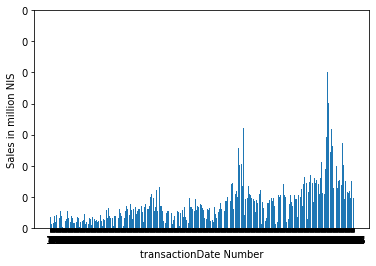

In [97]:
# Visul Month
days = range(1,1167) #For x axes
results = fashion_df.groupby('transactionDate').sum()
results.Sales
plt.bar(days, results['Sales'])
plt.xticks(days)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #scaling in million nis
plt.ylabel('Sales in million NIS')
plt.xlabel('transactionDate Number')

plt.show()

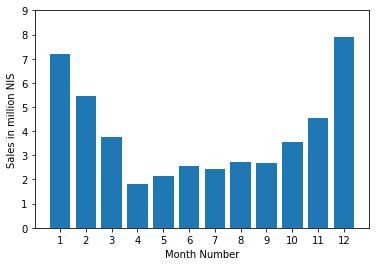

In [91]:
# Visul Month
months = range(1,13) #For x axes
results = fashion_df.groupby('Month').sum()
results.Sales
plt.bar(months, results['Sales'])
plt.xticks(months)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #scaling in million nis
plt.ylabel('Sales in million NIS')
plt.xlabel('Month Number')

plt.show()

### **LETS FIND SOME INSIGHTS**

**What Products Are Most Often Sold Together?**

In [92]:
#Marge together with the family products
new_all = pd.merge(fashion_df, product_df, on="makat")
new_all

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,productFamily,familiydescription,calss1,class2,class3,paritMerakez,customerPrice,gender,seaseon,status_y
0,1011012090,101,2011-01-01,19:10:00,139.9,139.90,SM9406010XL,1,0.0,139.90,...,34,accessories,gloves,Accessories,Accessories,SM9406,139.9,male,F09,outlet
1,1011012482,101,2011-01-25,16:10:00,139.9,179.80,SM9406010XL,1,0.0,139.90,...,34,accessories,gloves,Accessories,Accessories,SM9406,139.9,male,F09,outlet
2,1011012091,101,2011-01-01,19:12:00,139.9,0.00,SM9406010L,1,0.0,139.90,...,34,accessories,gloves,Accessories,Accessories,SM9406,139.9,male,F09,outlet
3,1051012264,105,2011-10-02,11:19:00,139.9,1749.65,SM9406010L,1,0.0,139.90,...,34,accessories,gloves,Accessories,Accessories,SM9406,139.9,male,F09,outlet
4,1051012513,105,2011-10-16,14:05:00,139.9,2299.22,SM9406010L,1,7.0,130.11,...,34,accessories,gloves,Accessories,Accessories,SM9406,139.9,male,F09,outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166434,1011036243,101,2014-03-23,14:51:00,169.9,954.75,AM6497350XXL,1,0.0,169.90,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,AM6497,169.9,male,S14,active
166435,1011036245,101,2014-03-23,15:09:00,239.9,381.12,OL5849542L,1,7.0,223.11,...,31,seasonal clothing,short sleeve shrit,Sportswear,Shirts,OL5849,239.9,female,S14,active
166436,1011036245,101,2014-03-23,15:09:00,169.9,381.12,AM6497866M,1,7.0,158.01,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,AM6497,169.9,male,S14,active
166437,1011036246,101,2014-03-23,15:29:00,589.9,1816.69,AM867901038,1,20.0,471.92,...,31,seasonal clothing,technical pant A,Sportswear,pants,AM8679,589.9,male,S14,active


In [94]:
new_all.drop(['transactionTime', 'pricePerUnit','DiscountPrecent','calss1','class2','class3','paritMerakez','customerPrice','familiydescription','productFamily','DiscountPrecent','gender','seaseon','NetPricePerUnit', 'brand','color','size', 'totalForDeal','NetPricePerUnit','DiscountPrecent','status_y','Month'], axis=1, inplace=True)

In [95]:
new_all

,transactionNum,branchCode,transactionDate,makat,itemAmount,total,saleCode,saleDescription,retuenCauseCode,returnCauseDescription,...,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status_x,CustomerID,Year,Sales,Unnamed: 0,productDescription
0,1011012090,101,2011-01-01,SM9406010XL,1,139.90,NaN,NaN,NaN,NaN,...,0.0,139.90,0.0,139.90,עודפים,10111090,2011,139.90,7732,MOUNTAIN ACC LINER GL_Black_XL
1,1011012482,101,2011-01-25,SM9406010XL,1,139.90,NaN,NaN,NaN,NaN,...,0.0,139.90,0.0,139.90,עודפים,10111242,2011,139.90,7732,MOUNTAIN ACC LINER GL_Black_XL
2,1011012091,101,2011-01-01,SM9406010L,1,139.90,NaN,NaN,NaN,NaN,...,0.0,139.90,0.0,139.90,עודפים,10111091,2011,139.90,7729,MOUNTAIN ACC LINER GL_Black_L
3,1051012264,105,2011-10-02,SM9406010L,1,139.90,NaN,NaN,NaN,NaN,...,0.0,139.90,0.0,139.90,עודפים,10511224,2011,139.90,7729,MOUNTAIN ACC LINER GL_Black_L
4,1051012513,105,2011-10-16,SM9406010L,1,130.11,NaN,NaN,NaN,NaN,...,7.0,130.11,0.0,130.11,עודפים,10511213,2011,130.11,7729,MOUNTAIN ACC LINER GL_Black_L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166434,1011036243,101,2014-03-23,AM6497350XXL,1,169.90,112CLUB,השני בחצי מחיר מועדון,NaN,NaN,...,25.0,127.42,0.0,127.42,פעיל,1011323,2014,169.90,11458,NEW MOUNTAIN TE dark bctry XXL
166435,1011036245,101,2014-03-23,OL5849542L,1,223.11,NaN,NaN,NaN,NaN,...,7.0,223.11,0.0,223.11,פעיל,1011324,2014,223.11,1520,MIGHTY PWR COOL SB berry jam L
166436,1011036245,101,2014-03-23,AM6497866M,1,158.01,NaN,NaN,NaN,NaN,...,7.0,158.01,0.0,158.01,פעיל,1011324,2014,158.01,11469,NEW MOUNTAIN TE orange M
166437,1011036246,101,2014-03-23,AM867901038,1,471.92,NaN,NaN,NaN,NaN,...,20.0,471.92,0.0,471.92,פעיל,1011324,2014,471.92,198,PASSO ALTO II Black 38


In [ ]:
new_all = new_all[new_all['transactionNum'].duplicated(keep=False)]
new_all.head(20)

,Unnamed: 0_x,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,...,productFamily,familiydescription,calss1,class2,class3,paritMerakez,customerPrice,gender,seaseon,status_y
0,0,1011022173,101,2012-07-24 00:00:00.000,1899-12-30 12:05:00.000,229.9,637.77,AL6305572L,1,20.0,...,31,seasonal clothing,thermal shirt,Sportswear,Shirts,AL6305,229.9,female,S12,outlet
1,9752,1051017367,105,2012-07-30 00:00:00.000,1899-12-30 12:17:00.000,229.9,1454.41,AL6305572L,1,30.0,...,31,seasonal clothing,thermal shirt,Sportswear,Shirts,AL6305,229.9,female,S12,outlet
2,1,1011022174,101,2012-07-24 00:00:00.000,1899-12-30 12:33:00.000,279.9,863.68,EM2042077XXL,1,20.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
3,9571,1051017076,105,2012-07-12 00:00:00.000,1899-12-30 15:37:00.000,279.9,1036.53,EM2042077XXL,1,7.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
4,45218,1061003814,106,2012-08-24 00:00:00.000,1899-12-30 14:14:00.000,279.9,426.86,EM2042077XXL,1,30.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
5,62910,1011020485,101,2012-04-08 00:00:00.000,1899-12-30 18:06:00.000,279.9,979.70,EM2042077XXL,1,50.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
7,114891,1081004149,108,2012-08-16 00:00:00.000,1899-12-30 16:57:00.000,279.9,399.85,EM2042077XXL,1,50.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
8,123400,1081003566,108,2012-07-20 00:00:00.000,1899-12-30 13:12:00.000,279.9,505.75,EM2042077XXL,1,30.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
9,125368,1081003255,108,2012-07-06 00:00:00.000,1899-12-30 12:50:00.000,279.9,497.76,EM2042077XXL,1,30.0,...,31,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet
10,2,1011022174,101,2012-07-24 00:00:00.000,1899-12-30 12:33:00.000,299.9,863.68,AM6236019XXL,1,20.0,...,31,seasonal clothing,polo shirt,Sportswear,Shirts,AM6236,299.9,male,S12,outlet


In [ ]:
new_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111037 entries, 0 to 170624
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0_x               111037 non-null  int64  
 1   transactionNum             111037 non-null  object 
 2   branchCode                 111037 non-null  int64  
 3   transactionDate            111037 non-null  object 
 4   transactionTime            111037 non-null  object 
 5   pricePerUnit               111037 non-null  float64
 6   totalForDeal               111037 non-null  float64
 7   makat                      111037 non-null  object 
 8   itemAmount                 111037 non-null  int64  
 9   DiscountPrecent            111037 non-null  float64
 10  NetPricePerUnit            111037 non-null  float64
 11  total                      111037 non-null  float64
 12  saleCode                   8001 non-null    object 
 13  saleDescription            80

In [ ]:
new_all.dtypes

Unnamed: 0_x                   int64
transactionNum                object
branchCode                     int64
transactionDate               object
transactionTime               object
pricePerUnit                 float64
totalForDeal                 float64
makat                         object
itemAmount                     int64
DiscountPrecent              float64
NetPricePerUnit              float64
total                        float64
saleCode                      object
saleDescription               object
retuenCauseCode              float64
returnCauseDescription        object
returnCauseComment            object
IsManualDiscount              object
isManualPrice                 object
priceAfterDiscount           float64
effectiveDiscountPrecent     float64
ActualPrice                  float64
generalPrecentageDiscount    float64
ActualProcePerDeal           float64
status_x                      object
CoustomerID                    int64
Sales                        float64
M

In [ ]:
new_all['transactionNum'].dtype

dtype('O')

In [ ]:
new_all['productDescription'].dtype

dtype('O')

In [ ]:
new_all = new_all.astype({"productDescription": str}) 

new_all.dtypes

Unnamed: 0_x                   int64
transactionNum                object
branchCode                     int64
transactionDate               object
transactionTime               object
pricePerUnit                 float64
totalForDeal                 float64
makat                         object
itemAmount                     int64
DiscountPrecent              float64
NetPricePerUnit              float64
total                        float64
saleCode                      object
saleDescription               object
retuenCauseCode              float64
returnCauseDescription        object
returnCauseComment            object
IsManualDiscount              object
isManualPrice                 object
priceAfterDiscount           float64
effectiveDiscountPrecent     float64
ActualPrice                  float64
generalPrecentageDiscount    float64
ActualProcePerDeal           float64
status_x                      object
CoustomerID                    int64
Sales                        float64
M

In [ ]:
new_all['transactionNum'] = new_all['transactionNum'].astype('str')

In [ ]:
new_all = new_all.astype('str')
new_all.dtypes

Unnamed: 0_x                 object
transactionNum               object
branchCode                   object
transactionDate              object
transactionTime              object
pricePerUnit                 object
totalForDeal                 object
makat                        object
itemAmount                   object
DiscountPrecent              object
NetPricePerUnit              object
total                        object
saleCode                     object
saleDescription              object
retuenCauseCode              object
returnCauseDescription       object
returnCauseComment           object
IsManualDiscount             object
isManualPrice                object
priceAfterDiscount           object
effectiveDiscountPrecent     object
ActualPrice                  object
generalPrecentageDiscount    object
ActualProcePerDeal           object
status_x                     object
CoustomerID                  object
Sales                        object
Month                       

In [ ]:
#Joining few products with the same order ID into the same line
new_all['ProductBundle'] = new_all.groupby('transactionNum')['productDescription'].transform(lambda x: '|'.join(x))

new_all.head()

,Unnamed: 0_x,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,...,familiydescription,calss1,class2,class3,paritMerakez,customerPrice,gender,seaseon,status_y,ProductBundle
0,0,1011022173,101,2012-07-24 00:00:00.000,1899-12-30 12:05:00.000,229.9,637.77,AL6305572L,1,20.0,...,seasonal clothing,thermal shirt,Sportswear,Shirts,AL6305,229.9,female,S12,outlet,WOMENS BASE NS W mirage L|WOMENS BASE NS W bro...
1,9752,1051017367,105,2012-07-30 00:00:00.000,1899-12-30 12:17:00.000,229.9,1454.41,AL6305572L,1,30.0,...,seasonal clothing,thermal shirt,Sportswear,Shirts,AL6305,229.9,female,S12,outlet,WOMENS BASE NS W mirage L|MENS BASE LAYE SS wh...
2,1,1011022174,101,2012-07-24 00:00:00.000,1899-12-30 12:33:00.000,279.9,863.68,EM2042077XXL,1,20.0,...,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet,INSIGHT ICE GR metal XXL|TIDAL COVE POL Cool G...
3,9571,1051017076,105,2012-07-12 00:00:00.000,1899-12-30 15:37:00.000,279.9,1036.53,EM2042077XXL,1,7.0,...,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet,"INSIGHT ICE GR metal XXL|XL,Navy,DRAFT LOGO T|..."
4,45218,1061003814,106,2012-08-24 00:00:00.000,1899-12-30 14:14:00.000,279.9,426.86,EM2042077XXL,1,30.0,...,seasonal clothing,aummer active shirt,Sportswear,Shirts,EM2042,279.9,male,S12,outlet,INSIGHT ICE GR metal XXL|COOL JEWELS SH metal XL


In [ ]:
 bundle = new_all.loc[:,['transactionNum','ProductBundle','makat']]
 bundle.head(10)

,transactionNum,ProductBundle,makat
0,1011022173,WOMENS BASE NS W mirage L|WOMENS BASE NS W bro...,AL6305572L
1,1051017367,WOMENS BASE NS W mirage L|MENS BASE LAYE SS wh...,AL6305572L
2,1011022174,INSIGHT ICE GR metal XXL|TIDAL COVE POL Cool G...,EM2042077XXL
3,1051017076,"INSIGHT ICE GR metal XXL|XL,Navy,DRAFT LOGO T|...",EM2042077XXL
4,1061003814,INSIGHT ICE GR metal XXL|COOL JEWELS SH metal XL,EM2042077XXL
5,1011020485,INSIGHT ICE GR metal XXL|NEW UTILIZER POLO Bla...,EM2042077XXL
7,1081004149,"INSIGHT ICE GR metal XXL|XL,sea salt,STERLING ...",EM2042077XXL
8,1081003566,INSIGHT ICE GR metal XXL|TIDAL COVE POL Cool G...,EM2042077XXL
9,1081003255,INSIGHT ICE GR metal XXL|כרטיס מועדון חדש|SOLA...,EM2042077XXL
10,1011022174,INSIGHT ICE GR metal XXL|TIDAL COVE POL Cool G...,AM6236019XXL


In [ ]:
# Importing libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in bundle_df['ProductBundle']:
  row_list = row.split('|')
  #count.update(Counter(combinations(row_list,2)))# counting all the 2 product bundle
  #count.update(Counter(combinations(row_list,3)))# counting all the 2 product bundle
  count.update(Counter(combinations(row_list,4)))# counting all the 2 product bundle
count.most_common(20)

[(('W BASELAYER MD TGT Black M',
   'W BASELAYER MD LS TOP Black L',
   'HW POWER STRETC Black M',
   'THRMOLATOR M PANT black M'),
  360),
 (('SPICA SNOW GOGGLES white',
   'W BSL HVY LS TOP Black XL',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'MIDWEIGHT  JR Black S',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'ALPINE ACTN PER abyss',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'MINX MID Black 40/9',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'SOCKS SKI+ MID OTC W black M',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'SOCKS SKI+ MID OTC M black M',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'MIDWEIGHT TIGHT JR Black M',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES whit

In [ ]:
count.most_common(10)

[(('W BASELAYER MD TGT Black M',
   'W BASELAYER MD LS TOP Black L',
   'HW POWER STRETC Black M',
   'THRMOLATOR M PANT black M'),
  360),
 (('SPICA SNOW GOGGLES white',
   'W BSL HVY LS TOP Black XL',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'MIDWEIGHT  JR Black S',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'ALPINE ACTN PER abyss',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'MINX MID Black 40/9',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'SOCKS SKI+ MID OTC W black M',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'SOCKS SKI+ MID OTC M black M',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES white',
   'MIDWEIGHT TIGHT JR Black M',
   'VEGA SNOW GOGGLES blue',
   ' HEAT rocket'),
  256),
 (('SPICA SNOW GOGGLES whit

## **What product sold the most?**

In [ ]:
product_group = new_all.groupby('productDescription')
product_group.count()

,Unnamed: 0_x,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,...,familiydescription,calss1,class2,class3,paritMerakez,customerPrice,gender,seaseon,status_y,ProductBundle
productDescription,,,,,,,,,,,,,,,,,,,,,
BLUES LEAN JEA_Indigo_8,67877,1011013194,101,2011-02-27 00:00:00.000,1899-12-30 12:13:00.000,339.9,587.8,AL83934318,1,30.01,...,seasonal clothing,causal pants A,Sportswear,pants,AL8393,339.9,female,F09,outlet,BLUES LEAN JEA_Indigo_8|WINTER TIDE SSHL blac...
BLUES LEAN JE_Indigo_10,103119,1051008112,105,2011-01-20 00:00:00.000,1899-12-30 16:58:00.000,339.9,464.85,AL839343110,1,0.0,...,seasonal clothing,causal pants A,Sportswear,pants,AL8393,339.9,female,F09,outlet,I2O TURTLENECK Black L| BLUES LEAN JE_Indigo_10
BLUES _Vintage Indigo_6,56576,1011012156,101,2011-01-05 00:00:00.000,1899-12-30 18:21:00.000,339.9,1827.01,AL83934716,1,30.0,...,seasonal clothing,causal pants A,Sportswear,pants,AL8393,339.9,female,F09,outlet,HEAVYWEIGHT PS GLV W_Black_S|POWER STRETCH GLV...
FITTED Black L\XL,2417731120371743839938958397537894983213835238...,1051021282105102367710510226071061007416106100...,1051051051061061061011011011011011011011011081...,2013-03-27 00:00:00.0002013-09-12 00:00:00.000...,1899-12-30 20:11:00.0001899-12-30 10:28:00.000...,99.999.999.999.999.999.999.999.999.999.999.999...,399.837.35399.8259.8239.8139.861179.62215.8399...,CU9490010LXLCU9490010LXLCU9490010LXLCU9490010L...,111111111111111111111111,0.00.00.00.00.030.050.030.00.050.050.07.050.05...,...,accessoriesaccessoriesaccessoriesaccessoriesac...,hat\scarfhat\scarfhat\scarfhat\scarfhat\scarfh...,AccessoriesAccessoriesAccessoriesAccessoriesAc...,AccessoriesAccessoriesAccessoriesAccessoriesAc...,CU9490CU9490CU9490CU9490CU9490CU9490CU9490CU94...,99.999.999.999.999.999.999.999.999.999.999.999...,unisexunisexunisexunisexunisexunisexunisexunis...,S13S13S13S13S13S13S13S13S13S13S13S13S13S13S13S...,outletoutletoutletoutletoutletoutletoutletoutl...,SUN RIDGE POLO Black XXL| FITTED Black L\XL FI...
FITTED Black S\M,4938986843149698178315178530,1061007998101102856811010015321121000015112100...,106101110112112,2013-06-12 00:00:00.0002013-05-05 00:00:00.000...,1899-12-30 18:57:00.0001899-12-30 16:30:00.000...,99.999.999.999.999.9,444.72229.81432.9309.85179.9,CU9490010SMCU9490010SMCU9490010SMCU9490010SMCU...,11111,15.039.9430.050.050.0,...,accessoriesaccessoriesaccessoriesaccessoriesac...,hat\scarfhat\scarfhat\scarfhat\scarfhat\scarf,AccessoriesAccessoriesAccessoriesAccessoriesAc...,AccessoriesAccessoriesAccessoriesAccessoriesAc...,CU9490CU9490CU9490CU9490CU9490,99.999.999.999.999.9,unisexunisexunisexunisexunisex,S13S13S13S13S13,outletoutletoutletoutletoutlet,ELM CREEK POLO whale XL|ELM CREEK POLO Black X...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שקית אל בד שחור,3314461905619166563365683658496766167999739117...,1061000455101101278310110127911011013650101101...,1061011011011011011011011011011011011011011011...,2011-11-25 00:00:00.0002011-02-06 00:00:00.000...,1899-12-30 12:20:00.0001899-12-30 18:50:00.000...,3.93.93.93.93.93.93.93.93.93.93.93.93.93.93.93...,1689.47.87.8303.81459.8633.69845.82855.5169.91...,3100093100093100093100093100093100093100093100...,111111111111111113,100.00.00.00.0100.00.0100.00.0100.00.0100.00.0...,...,familyfamilyfamilyfamilyfamilyfamilyfamilyfami...,nannannannannannannannannannannannannannannann...,nannannannannannannannannannannannannannannann...,nannannannannannannannannannannannannannannann...,nannannannannannannannannannannannannannannann...,3.93.93.93.93.93.93.93.93.93.93.93.93.93.93.93...,nannannannannannannannannannannannannannannann...,nannannannannannannannannannannannannannannann...,activeactiveactiveactiveactiveactiveactiveacti...,W BASELAYER MD LS TOP Black S|M BSLR MD LS TOP...
שקית אל בד תכלת,6707878478961003106311441339207347424777493161...,1051011241105101103910510110671051011086105101...,1051051051051051051051051061051051